In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
#import dataset
df = pd.read_csv('diabetes.csv')

# Encode Smoking_history variable
df['smoking_history'] = df['smoking_history'].replace('never', 1)
df['smoking_history'] = df['smoking_history'].replace('not current', 2)
df['smoking_history'] = df['smoking_history'].replace('former', 3)
df['smoking_history'] = df['smoking_history'].replace('current',4)
df['smoking_history'] = df['smoking_history'].replace('ever', 5)
df['smoking_history'] = df['smoking_history'].replace('No Info', 6)

# one-hot encode gender
gender = 'gender'
df[gender] = df[gender].replace('Male', 0)
df[gender] = df[gender].replace('Female', 1)
df[gender] = df[gender].replace('Other', 2)



df.head(10)

/var/folders/nj/kzsyvyz11z19qdb306ljw8_m0000gn/T/ipykernel_88891/2863450033.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoking_history'] = df['smoking_history'].replace('No Info', 6)
/var/folders/nj/kzsyvyz11z19qdb306ljw8_m0000gn/T/ipykernel_88891/2863450033.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[gender] = df[gender].replace('Other', 2)


gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       1  80.0             0              1                1  25.19   
1       1  54.0             0              0                6  27.32   
2       0  28.0             0              0                1  27.32   
3       1  36.0             0              0                4  23.45   
4       0  76.0             1              1                4  20.14   
5       1  20.0             0              0                1  27.32   
6       1  44.0             0              0                1  19.31   
7       1  79.0             0              0                6  23.86   
8       0  42.0             0              0                1  33.64   
9       1  32.0             0              0                1  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
5          6.6                   85         0  
6          6.5                  200         1  
7          5.7                   85         0  
8          4.8                  145         0  
9          5.0                  100         0

In [2]:
from sklearn.model_selection import train_test_split
X = df.drop("diabetes", axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 15, 20, 25, 30, 100, 400],
              'criterion': ['gini', 'entropy', 'log_loss']}

decision_tree = DecisionTreeClassifier(random_state=42)

grid_search_rf = GridSearchCV(decision_tree, 
                              param_grid=param_grid, 
                              cv=3,
                              scoring='recall',
                              return_train_score=True)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_


{'criterion': 'gini', 'max_depth': 100}

In [3]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=100, random_state=42)
# Train Decision Tree Classifer
dtc.fit(X_train, y_train)
#Predict the response for test dataset
pred = dtc.predict(X_test)
#Evaluation using Classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18283
           1       0.73      0.74      0.74      1717

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.86     20000
weighted avg       0.95      0.95      0.95     20000

[[17811   472]
 [  442  1275]]


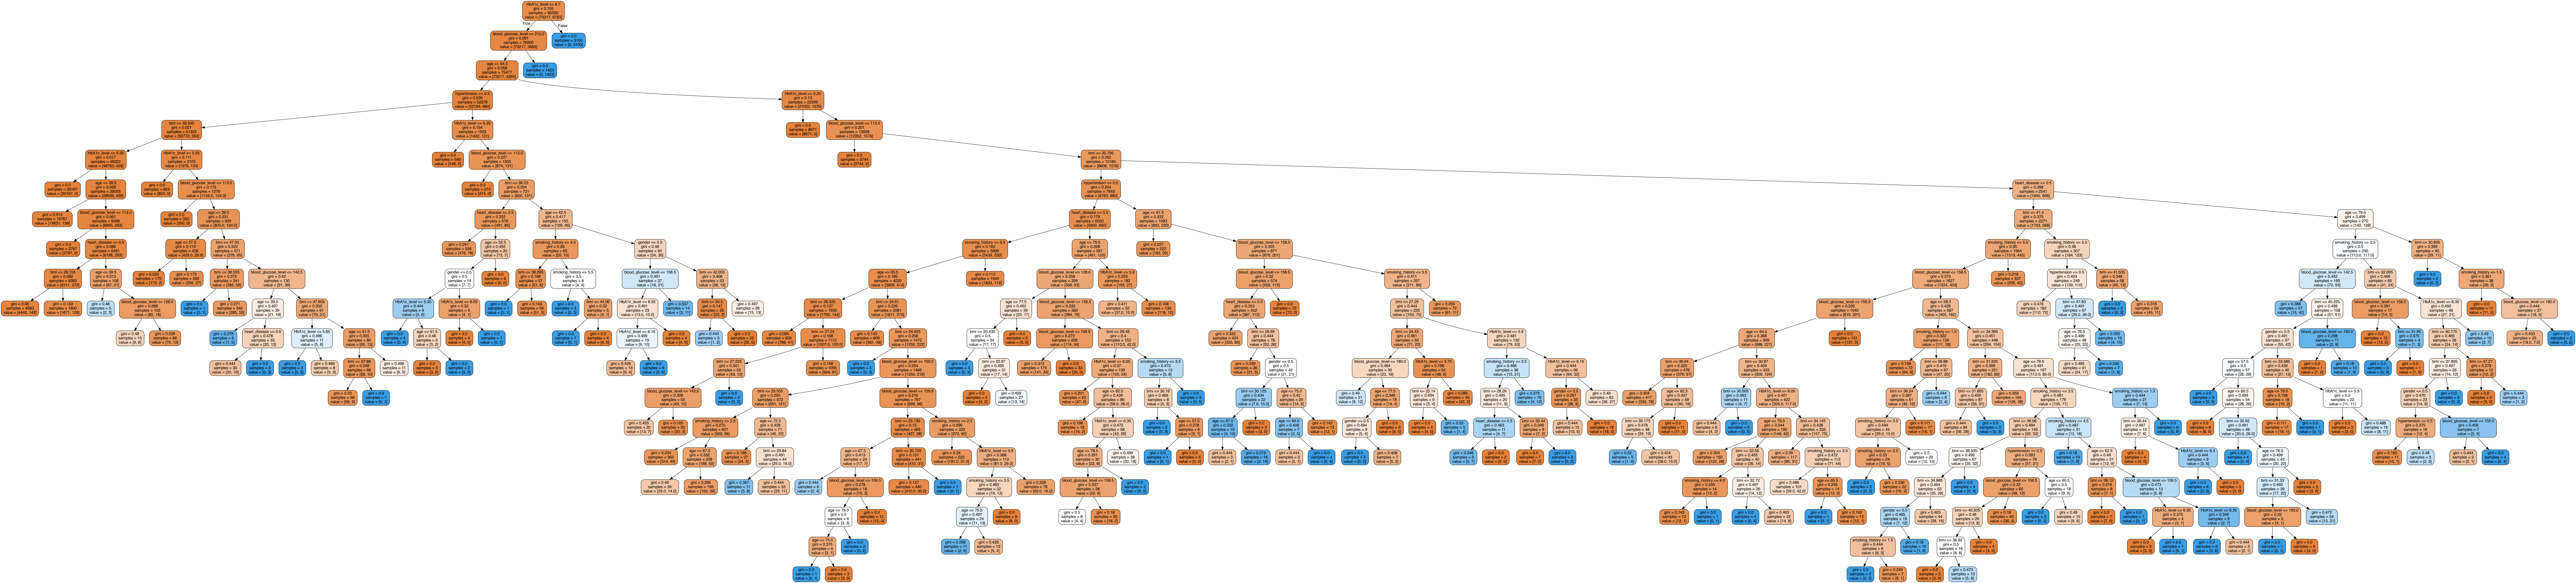

In [4]:
# Tree visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[:-1])

dtc = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=200, max_depth=100, random_state=42)
# Train Decision Tree Classifer
dtc.fit(X_train, y_train)
#Predict the response for test dataset
pred = dtc.predict(X_test)

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=features,
                filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [5]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 15, 20, 25, 30, 100, 400],
    'n_estimators': [100, 200, 300, 1000]
}

random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)

grid_search_rf = GridSearchCV(random_forest, 
                              param_grid=param_grid, 
                              cv=3,
                              scoring='recall',
                              return_train_score=True)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

{'max_depth': 25, 'n_estimators': 100}

In [6]:
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

rfc = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))



              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18283
           1       0.94      0.70      0.80      1717

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

[[18206    77]
 [  519  1198]]
